### Take the headbrain.csv 
### Apply Linear Regression 
### r2,b0,b1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("headbrain.csv")

In [3]:
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [5]:
# collect the x and y
x=data["Head Size(cm^3)"].values
x.shape

(237,)

In [6]:
# collect the x and y
y=data["Brain Weight(grams)"].values
x.shape

(237,)

In [7]:
## Calculating the coefficient
## Mean of x and y
mean_x=np.mean(x)
print(mean_x)
mean_y=np.mean(y)
print(mean_y)

3633.9915611814345
1282.873417721519


In [8]:
# Total no of values
n=len(x)
n

237

In [9]:
## y=b0 +b1x
## b0=y-b1x
## calculate the b1 and b0
numer=0
denom=0
for i in range(n):
    numer +=(x[i]-mean_x)*(y[i]-mean_y)
    denom += (x[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
print(b1)
print(b0)

0.26342933948939945
325.57342104944223


In [10]:
print("The Linear equation is: y={:.4}x+{:.5}".format(b1,b0))

The Linear equation is: y=0.2634x+325.57


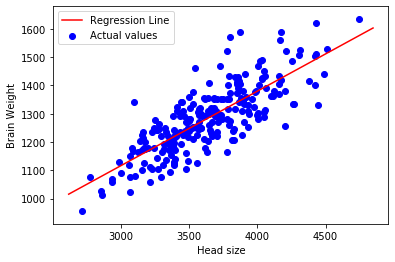

In [12]:
# plotting the values and regression line
max_x=np.max(x)+100
min_x=np.min(x)-100
#print(max_x) 
#print(min_x)
x1=np.linspace(min_x,max_x,1000)
y1=b0+b1*x1

plt.plot(x1,y1,color="red",label="Regression Line")
plt.scatter(x,y,c="Blue",label="Actual values")
plt.xlabel("Head size")
plt.ylabel("Brain Weight")
plt.legend(loc="best")
plt.show()

In [13]:
y_pred=b0+b1*x[2]
y_pred

1448.0458366137732

In [15]:
# Determination coefficient(R2)--(0 to 1)
ss_tot=0
ss_res=0
for i in range(n):
    y_pred=b0+b1*x[i]
    ss_res += (y[i]-y_pred)**2
    ss_tot += (y[i]-mean_y)**2
r2=1-(ss_res/ss_tot)
print(r2)

0.6393117199570003


In [16]:
## Using Sklearn
from sklearn.linear_model import LinearRegression
x=data["Head Size(cm^3)"].values.reshape(-1,1)
y=data["Brain Weight(grams)"].values.reshape(-1,1)
reg=LinearRegression()  #Applying the data to the model
reg.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(reg.coef_)

[[0.26342934]]


In [18]:
print(reg.intercept_)

[325.57342105]


In [24]:
reg.predict([[4512]])

array([[1514.16660083]])

In [20]:
pred=reg.predict(x)
pred

array([[1514.16660083],
       [1310.27229206],
       [1448.04583661],
       [1320.5460363 ],
       [1425.9177721 ],
       [1269.96760312],
       [1322.65347102],
       [1263.11844029],
       [1277.34362462],
       [1374.5490509 ],
       [1232.56063691],
       [1377.44677363],
       [1284.45621679],
       [1434.08408162],
       [1335.03464997],
       [1346.62554091],
       [1246.78582124],
       [1238.61951172],
       [1140.88722677],
       [1490.98481895],
       [1347.15239959],
       [1391.40852862],
       [1327.65862847],
       [1302.89627056],
       [1576.07249561],
       [1490.72138961],
       [1388.77423523],
       [1385.08622448],
       [1235.45835965],
       [1425.39091342],
       [1323.1803297 ],
       [1325.55119375],
       [1406.42400097],
       [1421.70290266],
       [1420.91261465],
       [1330.29292186],
       [1254.68870143],
       [1312.90658546],
       [1203.84683891],
       [1245.46867455],
       [1369.28046411],
       [1248.893

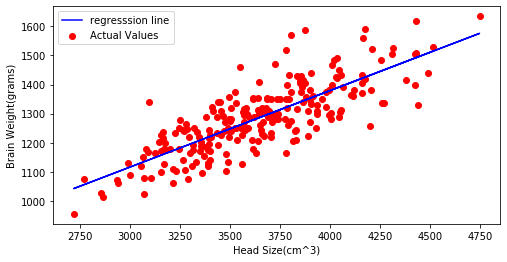

In [22]:
plt.figure(figsize=(8,4))
plt.scatter(data["Head Size(cm^3)"],data["Brain Weight(grams)"],c="red",label="Actual Values")
plt.plot(data["Head Size(cm^3)"],pred,c="Blue",label="regresssion line")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend(loc="best")
plt.show()

In [23]:
## R2 score
r2=reg.score(x,y)
print("R2 score:",r2)

R2 score: 0.639311719957


In [25]:
reg.score(x,y)

0.639311719957